### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.


In [36]:
import re
import string


line = "\ufeffMy name is Hal!"
re.sub(r'[^\x00-\x7F]+', '', line).translate(str.maketrans('', '', string.punctuation)).lower()

'my name is hal'

In [125]:

wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        # clean up the line variable: remove punctuation, remove non-ascci characters, and convert to lower case
        line = line.translate(str.maketrans('', '', string.punctuation)).lower()
        line = re.sub(r'[^\x00-\x7F]+', '', line)
        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('the', 9255)
('project', 90)
('gutenberg', 87)
('ebook', 13)
('of', 4532)
('life', 89)
('on', 947)
('mississippi', 159)
('this', 781)
('is', 1148)
('for', 1095)
('use', 48)
('anyone', 5)
('anywhere', 18)
('in', 2593)
('united', 37)
('states', 54)
('and', 5892)
('most', 124)
('other', 270)
('parts', 9)
('world', 68)
('at', 750)
('no', 422)
('cost', 25)
('with', 1081)
('almost', 38)
('restrictions', 2)
('whatsoever', 2)
('you', 1033)
('may', 89)
('copy', 17)
('it', 2293)
('give', 81)
('away', 172)
('or', 581)
('reuse', 2)
('under', 119)
('terms', 26)
('license', 24)
('included', 3)
('online', 4)
('wwwgutenbergorg', 5)
('if', 381)
('are', 387)
('not', 722)
('located', 9)
('will', 301)
('have', 571)
('to', 3592)
('check', 4)
('laws', 17)
('country', 77)
('where', 174)
('before', 208)
('using', 11)
('title', 3)
('author', 3)
('mark', 24)
('twain', 26)
('release', 1)
('date', 18)
('july', 7)
('10', 10)
('2004', 1)
('245', 1)
('recently', 4)
('updated', 2)
('january', 3)
('1', 13)
('2021', 1


Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.



In [126]:
wdict_sorted = sorted(wdict.items(), key=lambda x: x[1], reverse=True)
print("Top 100 most frequent words:", wdict_sorted[:100])


Top 100 most frequent words: [('the', 9255), ('and', 5892), ('of', 4532), ('a', 4053), ('to', 3592), ('in', 2593), ('it', 2293), ('i', 2205), ('was', 2093), ('that', 1724), ('he', 1402), ('is', 1148), ('for', 1095), ('with', 1081), ('you', 1033), ('his', 961), ('had', 961), ('but', 952), ('on', 947), ('as', 881), ('this', 781), ('they', 758), ('at', 750), ('not', 722), ('all', 720), ('by', 713), ('one', 686), ('there', 627), ('were', 625), ('be', 617), ('my', 582), ('or', 581), ('from', 577), ('have', 571), ('out', 541), ('so', 536), ('up', 529), ('him', 523), ('we', 519), ('me', 516), ('when', 505), ('would', 478), ('which', 476), ('river', 457), ('an', 440), ('them', 425), ('no', 422), ('then', 405), ('said', 399), ('are', 387), ('if', 381), ('their', 378), ('now', 369), ('about', 346), ('time', 337), ('been', 335), ('down', 328), ('its', 323), ('could', 313), ('has', 305), ('will', 301), ('into', 300), ('what', 285), ('her', 278), ('two', 273), ('do', 271), ('other', 270), ('some', 

In [128]:
total_words = sum(wdict.values())
print("Total number of words in the text:", str(total_words))

tot = 0
for i, (key, val) in enumerate(wdict_sorted):
    tot += val
    if tot > 0.9*total_words: 
        print("90% of the words are accounted for by the first", str(i), "words")
        break


Total number of words in the text: 147420
90% of the words are accounted for by the first 3731 words


## Embedding
Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

Class code:

In [129]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')


print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary

# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)

# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)


The vocabulary size is:  30522
(30522, 1024)
4000
10000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 1.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.166s
[t-SNE] Iteration 50: error = 97.8525848, gradie

Oritingal plot:

In [ ]:
fig = plt.figure()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    
plt.show

Zoomed-in plot

In [132]:
xmin = np.min(bert_word_embs_to_use_tsne[:,0])
xmax = np.max(bert_word_embs_to_use_tsne[:,0])
ymin = np.min(bert_word_embs_to_use_tsne[:,1])
ymax = np.max(bert_word_embs_to_use_tsne[:,1])

print(xmin, xmax, ymin, ymax)

-131.0834 122.40297 -145.79181 137.64803


<function matplotlib.pyplot.show(close=None, block=None)>

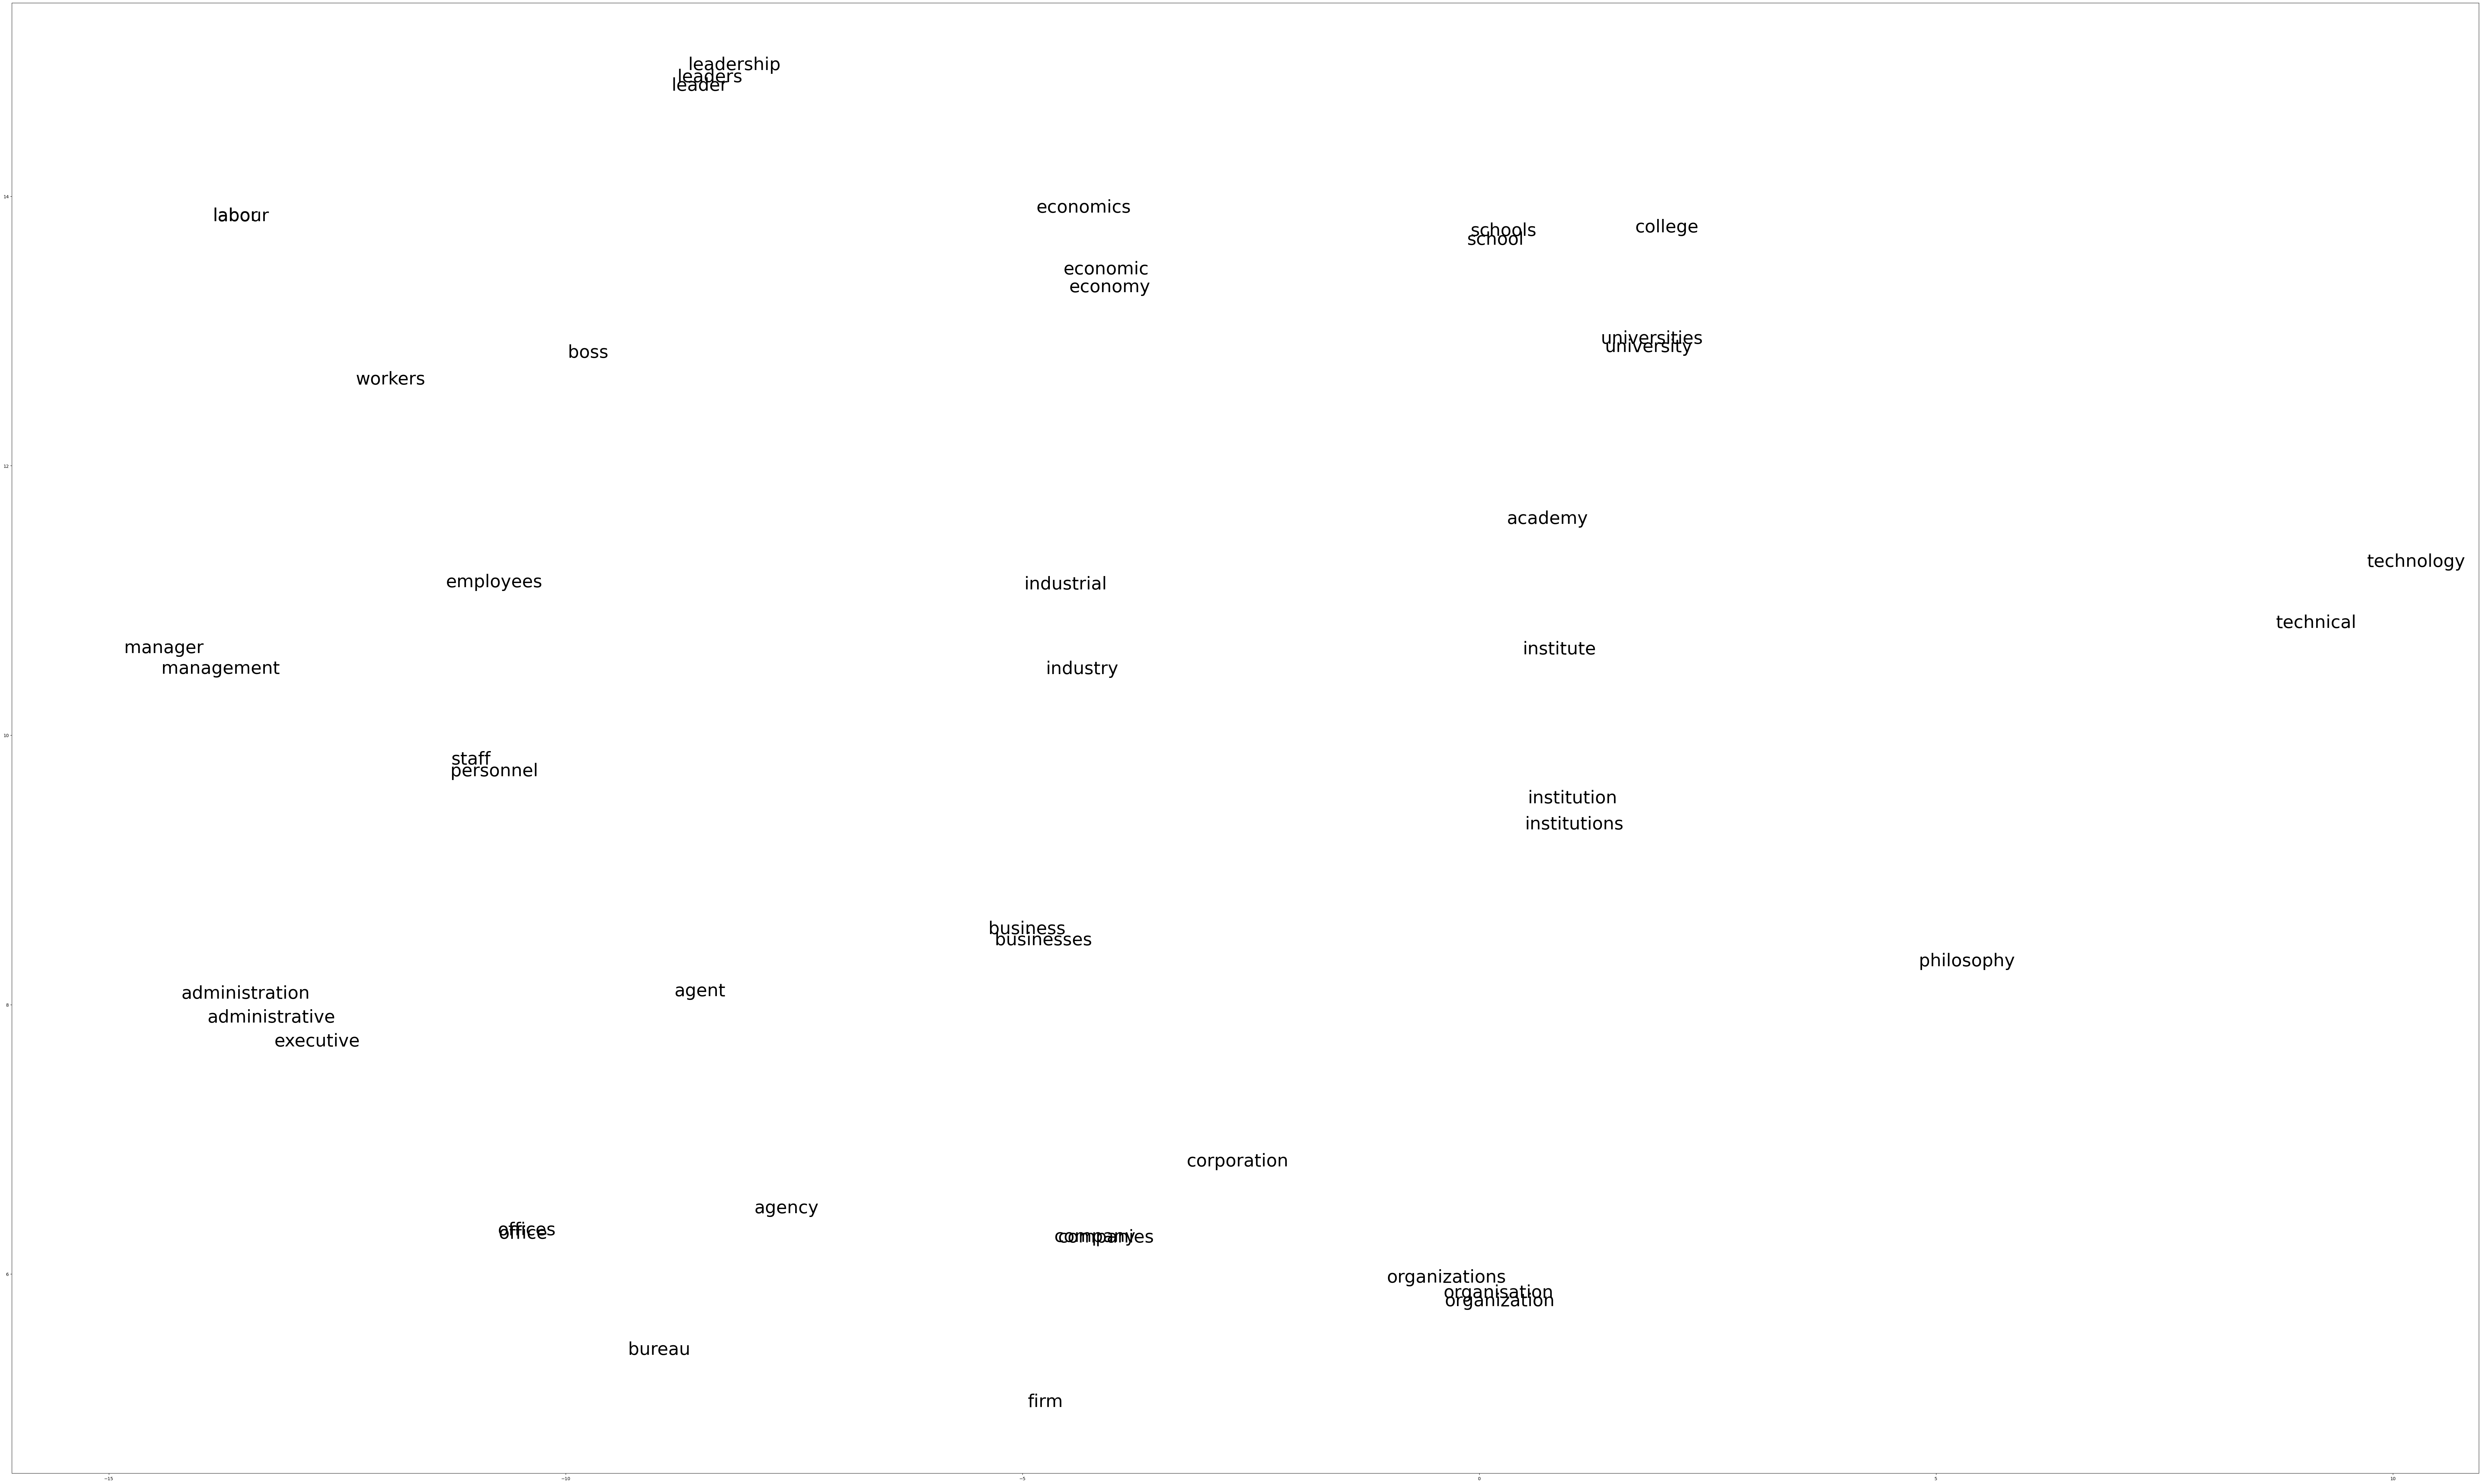

In [146]:
# choose a range of x and y values to zoom in on
xrange = [-15, 10]
yrange = [5, 15]

fig = plt.figure()
for i, txt in enumerate(bert_words_to_plot):
    if bert_word_embs_to_use_tsne[i,0] > xrange[0] and bert_word_embs_to_use_tsne[i,0] < xrange[1] and bert_word_embs_to_use_tsne[i,1] > yrange[0] and bert_word_embs_to_use_tsne[i,1] < yrange[1]:
        plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
        currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif', fontsize=40)

plt.show